In [207]:
import os 
import matplotlib.pyplot as plt 
import cv2
import numpy as np

In [208]:
DATADIR="D:\\machine learning\\new project ml"
CATAGORIES=["asset1","asset2"]

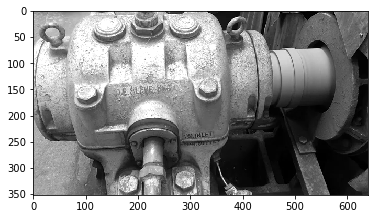

In [209]:
for catagories in CATAGORIES:
    path=os.path.join(DATADIR,catagories)
    
    for img in os.listdir(path):
        image=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(image,cmap="gray")
        plt.show
        break

In [210]:
IMG_SIZE=32

In [211]:
dataset=[]
def create_training_data():
    for catagories in CATAGORIES:
        path=os.path.join(DATADIR,catagories)
        class_num=CATAGORIES.index(catagories)
        for img in os.listdir(path):
            image=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            new_array=cv2.resize(image,(IMG_SIZE,IMG_SIZE))
            dataset.append([new_array,class_num])
            
create_training_data()

In [212]:
len(dataset)

604

In [213]:
import random
random.shuffle(dataset)

In [214]:

X=[]
Y=[]

for feature ,label in dataset:
    X.append(feature)
    Y.append(label)

In [215]:
X=np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [216]:
X.shape

(604, 32, 32, 1)

In [217]:
import pickle

In [218]:

from keras.utils.np_utils import to_categorical
from keras.utils import np_utils

In [219]:
Y=to_categorical(Y)

In [220]:

Y.shape

(604, 2)

In [221]:
Y[500]

array([0., 1.], dtype=float32)

In [222]:
from sklearn.model_selection import train_test_split

In [223]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)

In [224]:
X_train=X_train/255
X_test=X_test/255

In [225]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Activation,MaxPooling2D,Flatten,Dense,MaxPool2D,Dropout
from tensorflow.keras.callbacks import TensorBoard
model=Sequential()

In [226]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (32,32,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(2, activation = "softmax"))

In [227]:
model.compile(optimizer = "adam" , loss = "binary_crossentropy", metrics=["accuracy"])

In [228]:
model.fit(X_train,y_train, batch_size = 100, epochs =2)

Epoch 1/2
483/483 [==============================] - 7s 15ms/step - loss: 0.4369 - acc: 0.7888
Epoch 2/2
483/483 [==============================] - 6s 12ms/step - loss: 0.0031 - acc: 1.0000


In [229]:
from keras.preprocessing.image import ImageDataGenerator

In [230]:
datagen = ImageDataGenerator(
    featurewise_center=False,  
    samplewise_center=False,  
    featurewise_std_normalization=False,  
    samplewise_std_normalization=False,  
    zca_whitening=False,  
    rotation_range=45,  
    width_shift_range=0.2,  
    height_shift_range=0.2,  
    horizontal_flip=True,  
    vertical_flip=True)

In [231]:
datagen.fit(X)

In [232]:
model.fit_generator(datagen.flow(X, Y, batch_size = 32),
                    steps_per_epoch = len(X) / 32, # number of samples per gradient update
                    epochs = 3, # number of iterations
                    validation_data= (X, Y),
                    verbose=1)

Epoch 1/3
19/18 [==============================] - 10s 550ms/step - loss: 6.7264 - acc: 0.5804 - val_loss: 1.0960e-07 - val_acc: 1.0000
Epoch 2/3
19/18 [==============================] - 10s 526ms/step - loss: 6.9673 - acc: 0.5654 - val_loss: 1.0960e-07 - val_acc: 1.0000
Epoch 3/3
19/18 [==============================] - 10s 520ms/step - loss: 6.4219 - acc: 0.5994 - val_loss: 1.0960e-07 - val_acc: 1.0000


In [233]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

121/121 [==============================] - 0s 4ms/step
Test accuracy: 1.0


In [234]:
with open ("test.pkl","rb") as f:
    test=pickle.load(f)

In [235]:
test1=test/255


In [236]:
predictions = model.predict(test1)

In [247]:
predictions[1]

array([3.131023e-33, 1.000000e+00], dtype=float32)

In [248]:
np.argmax(predictions[1])

1

In [245]:
predictions[3]

array([1., 0.], dtype=float32)

In [246]:
np.argmax(predictions[3])

0